In [2]:
from Bio import SeqIO
import random
import RNA
import statistics

Rna_file = SeqIO.read("/home/mescalin/bioinf2/Downloads/12q22_BAC_RPCI11-256L6.fasta", "fasta")
print(Rna_file)

sequence = str(Rna_file.seq)
sequence_random = [sequence]

for i in range(299):
    sequence_list = list(sequence)
    random.shuffle(sequence_list)
    shuffled_seq = ''.join(sequence_list) 
    sequence_random.append(shuffled_seq)

md = RNA.md()
mfe_values = []

for i, seq in enumerate(sequence_random[:3], 1):
    fc = RNA.fold_compound(seq, md)     
    structure, mfe = fc.mfe() 
    mfe_values.append(mfe)
    print(f"Sequence {i}:")             
    print(f"Seq: {seq[:3]}...")           
    print(f"MFE: {mfe} kcal/mol")
    print(f"Structure: {structure}")   

for seq in sequence_random[3:]:  
    fc = RNA.fold_compound(seq, md)
    structure, mfe = fc.mfe()
    mfe_values.append(mfe)

print(f"\nTotal sequences folded: {len(sequence_random)}")
print(f"Average MFE: {statistics.mean(mfe_values)}")
print(f"Standard Deviation: {statistics.stdev(mfe_values)}")  

ID: AC007298.17:c145366-145295
Name: AC007298.17:c145366-145295
Description: AC007298.17:c145366-145295 Homo sapiens 12q22 BAC RPCI11-256L6 (Roswell Park Cancer Institute Human BAC Library) complete sequence
Number of features: 0
Seq('TCCTCGTTAGTATAGTGGTGAGTATCCCCGCCTGTCACGCGGGAGACCGGGGTT...GAG')
Sequence 1:
Seq: TCC...
MFE: -27.0 kcal/mol
Structure: ((((((((........((.((((..((((((((((...)))))....)))))....)))).)))))))))).
Sequence 2:
Seq: GTA...
MFE: -20.799999237060547 kcal/mol
Structure: (((.((((.....)))).)))..((((...((((.....((((((.....))))))....))))...)))).
Sequence 3:
Seq: CGT...
MFE: -21.799999237060547 kcal/mol
Structure: .((((.(........).))))(((((.(((((((((((........))))))..)))))...))))).....

Total sequences folded: 300
Average MFE: -24.437666676839193
Standard Deviation: 2.986404110617137


In [3]:
test_value = 0.223423462435234
print("{:.2e}".format(test_value))
print(f"{test_value}")

2.23e-01
0.223423462435234


In [4]:
import csv

with open("shuffled_rna.csv", 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["ID", "Sequence", "Structure", "MFE"]) 

    for i in range(0, 300):
        seq = sequence_random[i]
        fc = RNA.fold_compound(seq, md)     
        structure, mfe = fc.mfe() 
        mfe_values.append(mfe)
        writer.writerow([f"sequence_{i}", seq, structure, mfe])


In [40]:
import pandas as pd
import numpy as np
import scipy.stats as stats

mean = statistics.mean(mfe_values)
std = statistics.stdev(mfe_values)
org_data = pd.read_csv("shuffled_rna.csv")
org_mfe = org_data.loc[0, "MFE"]

mfe_values = org_data["MFE"].values
z_scores = stats.zscore(mfe_values)
z_score_first = z_scores[0]

print(z_score_first)

-0.8594331141277667


Text(0.5, 1.0, 'MFE for mononucletide shuffled sequence')

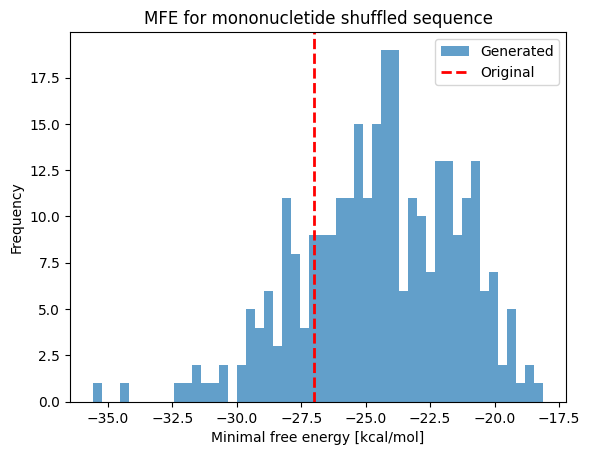

In [6]:
import matplotlib.pyplot as plt

mfe_generated = mfe_values[1:299]
mfe_original = mfe_values[0]

plt.hist(mfe_generated, bins=50, alpha=0.7, label='Generated')
plt.axvline(mfe_original, color='red', linestyle='--', linewidth=2, label='Original')

plt.xlabel('Minimal free energy [kcal/mol]')
plt.ylabel('Frequency')
plt.legend()
plt.title('MFE for mononucletide shuffled sequence')

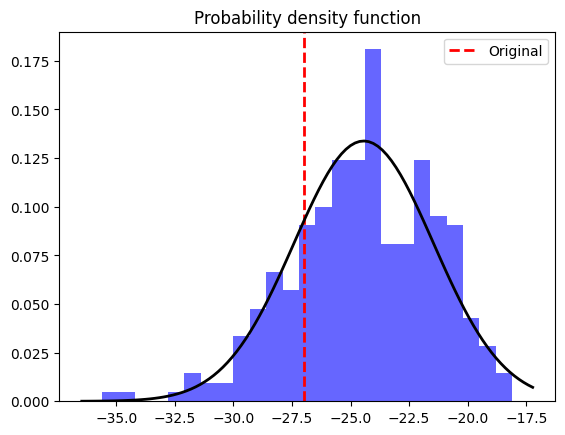

In [7]:
from scipy.stats import norm

mean, std = norm.fit(mfe_values)
plt.hist(mfe_values, bins=25, density=True, alpha=0.6, color='b')
plt.axvline(mfe_original, color='red', linestyle='--', linewidth=2, label='Original')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mean, std)

plt.title('Probability density function')
plt.legend()
plt.show()


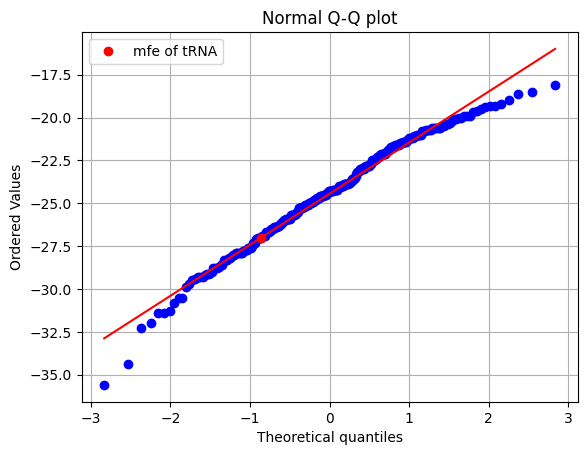

In [8]:
stats.probplot(mfe_values, dist="norm", plot=plt)
plt.plot(z_score_first, mfe_values[0],'ro', label='mfe of tRNA')
plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
print(f"Probability of getting less than the original Z-value: {stats.norm.cdf(z_score_first)}")

Probability of getting less than the original Z-value: 0.1950508034262719


In [10]:
import varnaapi
v = varnaapi.Structure(sequence=sequence, structure=structure)
v.show()

Output file: /tmp/tmppqqdj2dl.svg



JupyterSvgImage(svg='<?xml version="1.0" encoding="UTF-8"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" \n"http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n\n<svg width="396.5282816908443px" height="188px" version="1.1" viewBox="0 0 400 200" \nxmlns="http://www.w3.org/2000/svg">\n<line x1="57.72709523951144" y1="174.753851456216" x2="65.22709523951144" y2="174.753851456216" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="75.22709523951144" y1="174.753851456216" x2="82.72709523951144" y2="174.753851456216" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="92.72709523951144" y1="174.753851456216" x2="100.22709523951144" y2="174.753851456216" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="110.22709523951144" y1="174.753851456216" x2="117.72709523951144" y2="174.753851456216" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="127.72709523951144" y1="174.753851456216" x2="135.22709523951144" y2="174.753851456216" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="145.22709523951144" y1="174.753851456216" x2="152.72709523951144" y2="174.753851456216" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="162.72709523951144" y1="174.75385145621604" x2="170.22709523951144" y2="174.75385145621604" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="180.22709523951144" y1="174.75385145621604" x2="187.72709523951144" y2="174.75385145621604" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="197.72709523951144" y1="174.75385145621604" x2="205.22709523951144" y2="174.75385145621604" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="215.22709523951144" y1="174.75385145621604" x2="222.72709523951144" y2="174.75385145621604" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="227.72709523951144" y1="169.75385145621604" x2="227.72709523951144" y2="159.753851456216" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="227.72709523951144" y1="149.753851456216" x2="227.72709523951144" y2="139.75385145621604" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="227.72709523951144" y1="129.75385145621604" x2="227.72709523951144" y2="119.75385145621605" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="227.72709523951144" y1="109.75385145621605" x2="227.72709523951144" y2="99.75385145621605" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="223.54304194052605" y1="92.01638949460829" x2="217.2670011669967" y2="87.91022218282902" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="208.5014731674865" y1="87.17528102472147" x2="199.3385237664369" y2="91.18032263172194" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="190.1755743653873" y1="95.18536423872237" x2="181.0126249643377" y2="99.19040584572284" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="171.8496755632881" y1="103.19544745272327" x2="162.6867261622385" y2="107.20048905972374" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="153.52377676118888" y1="111.20553066672417" x2="144.3608273601393" y2="115.21057227372464" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="135.19787795908968" y1="119.21561388072507" x2="126.0349285580401" y2="123.22065548772554" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="116.87197915699048" y1="127.22569709472597" x2="107.70902975594089" y2="131.23073870172644" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="98.54608035489127" y1="135.23578030872687" x2="89.38313095384169" y2="139.24082191572734" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="80.22018155279207" y1="143.24586352272777" x2="71.05723215174248" y2="147.25090512972824" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="61.89428275069287" y1="151.25594673672867" x2="52.73133334964328" y2="155.26098834372914" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="44.06965137155825" y1="160.15347602803345" x2="37.949311273684856" y2="164.4884470182

In [ ]:

smallest_energy = mfe_values[0]

for n in mfe_values:
    if n < smallest_energy:
        smallest_energy = n 

index_min = np.argmin(mfe_values)
print('The samllest mfe in the random generated sequensce in position:', index_min, 'and had the energy:', smallest_energy)

min_energy = pd.read_csv("shuffled_rna.csv")
min_energy = min_energy.loc[233, "Sequence"]
min_structure = pd.read_csv("shuffled_rna.csv")
min_structure = min_structure.loc[233, "Structure"]
v = varnaapi.Structure(sequence=min_energy, structure=min_structure)
v.show()




The samllest mfe in the random generated sequensce in in position: 233 and had the energy: -35.599998474121094


Output file: /tmp/tmpcdarba5a.svg



JupyterSvgImage(svg='<?xml version="1.0" encoding="UTF-8"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" \n"http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n\n<svg width="417.86094323484406px" height="291px" version="1.1" viewBox="0 0 500 300" \nxmlns="http://www.w3.org/2000/svg">\n<line x1="192.8609432348441" y1="278.28729855172685" x2="200.3609432348441" y2="278.28729855172685" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="210.3609432348441" y1="278.28729855172685" x2="217.8609432348441" y2="278.28729855172685" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="227.8609432348441" y1="278.28729855172685" x2="235.3609432348441" y2="278.28729855172685" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="245.36094323484406" y1="278.28729855172685" x2="252.86094323484406" y2="278.28729855172685" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="262.86094323484406" y1="278.28729855172685" x2="270.36094323484406" y2="278.28729855172685" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="280.36094323484406" y1="278.28729855172685" x2="287.86094323484406" y2="278.28729855172685" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="297.86094323484406" y1="278.28729855172685" x2="305.36094323484406" y2="278.28729855172685" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="310.36094323484406" y1="273.28729855172685" x2="310.36094323484406" y2="263.28729855172685" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="310.36094323484406" y1="253.28729855172685" x2="310.36094323484406" y2="243.28729855172685" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="310.36094323484406" y1="233.28729855172685" x2="310.36094323484406" y2="223.28729855172685" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="310.36094323484406" y1="213.28729855172685" x2="310.36094323484406" y2="203.28729855172685" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="310.36094323484406" y1="193.28729855172685" x2="310.36094323484406" y2="183.28729855172685" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="310.36094323484406" y1="173.28729855172685" x2="310.36094323484406" y2="163.28729855172685" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="310.36094323484406" y1="153.28729855172685" x2="310.36094323484406" y2="143.28729855172685" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="310.36094323484406" y1="133.28729855172685" x2="310.36094323484406" y2="123.28729855172685" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="310.36094323484406" y1="113.28729855172685" x2="310.36094323484406" y2="103.28729855172685" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="310.36094323484406" y1="93.28729855172685" x2="310.36094323484406" y2="83.28729855172685" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="306.82540932891135" y1="74.75176464579411" x2="304.1307086917602" y2="72.05706400864298" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="295.5951747858275" y1="68.52153010271024" x2="285.5951747858275" y2="68.52153010271024" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="275.5951747858275" y1="68.52153010271024" x2="265.5951747858275" y2="68.52153010271024" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="255.5951747858275" y1="68.52153010271024" x2="245.5951747858275" y2="68.52153010271024" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="235.5951747858275" y1="68.52153010271024" x2="225.5951747858275" y2="68.52153010271024" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="215.5951747858275" y1="68.52153010271024" x2="205.5951747858275" y2="68.52153010271024" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="195.5951747858275" y1="68.52153010271024" x2="185.5951747858275" y2="68.52153010271024" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="175.97358314090476" y1="70.42964190959688" x2="169.0412300006674

In [65]:

index_max = np.argmax(mfe_values)
largest_energy = mfe_values[index_max]
print('The biggest mfe in the random generated sequensce in position:', index_max, 'and had the energy:', largest_energy)

max_energy = pd.read_csv("shuffled_rna.csv")
max_energy = max_energy.loc[297, "Sequence"]
max_structure = pd.read_csv("shuffled_rna.csv")
max_structure = max_structure.loc[297, "Structure"]
v = varnaapi.Structure(sequence=max_energy, structure=max_structure)
v.show()





The biggest mfe in the random generated sequensce in position: 297 and had the energy: -18.100000381469727


Output file: /tmp/tmplrvochgx.svg



JupyterSvgImage(svg='<?xml version="1.0" encoding="UTF-8"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" \n"http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n\n<svg width="188px" height="551.3248806960648px" version="1.1" viewBox="0 0 200 600" \nxmlns="http://www.w3.org/2000/svg">\n<line x1="15.0" y1="538.8248806960648" x2="22.5" y2="538.8248806960648" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="32.5" y1="538.8248806960648" x2="40.0" y2="538.8248806960648" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="50.0" y1="538.8248806960648" x2="57.5" y2="538.8248806960648" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="67.5" y1="538.8248806960648" x2="75.0" y2="538.8248806960648" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="85.0" y1="538.8248806960648" x2="92.5" y2="538.8248806960648" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="97.5" y1="533.8248806960648" x2="97.5" y2="523.8248806960648" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="97.5" y1="513.8248806960648" x2="97.5" y2="503.82488069606484" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="97.5" y1="493.82488069606484" x2="97.5" y2="483.82488069606484" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="94.53437679219797" y1="474.7993274434863" x2="90.08593989040025" y2="468.7609947275123" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="87.12031668259823" y1="459.73544147493374" x2="87.12031668259823" y2="452.2354379510628" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="90.08593989040025" y1="443.2098846984842" x2="94.53437679219797" y2="437.1715519825103" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="97.5" y1="428.14599872993176" x2="97.5" y2="418.14599872993176" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="95.59188819311336" y1="408.524407085009" x2="92.72973465539738" y2="401.5920539447717" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="92.72973465539737" y1="392.34887065492626" x2="95.59188819311336" y2="385.41651751468896" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="97.49999999999999" y1="375.7949258697662" x2="97.5" y2="365.7949258697662" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="97.5" y1="355.7949258697662" x2="97.5" y2="345.7949258697662" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="97.5" y1="335.7949258697662" x2="97.5" y2="325.7949258697662" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="97.5" y1="315.7949258697662" x2="97.5" y2="305.7949258697662" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="97.5" y1="295.7949258697662" x2="97.5" y2="285.7949258697662" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="97.5" y1="275.7949258697662" x2="97.5" y2="265.7949258697662" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="94.53437679219796" y1="256.7693726171876" x2="90.08593989040027" y2="250.73103990121376" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="87.12031668259823" y1="241.7054866486352" x2="87.12031668259823" y2="234.2054831247641" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="90.08593989040027" y1="225.17992987218554" x2="94.53437679219796" y2="219.14159715621167" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="95.59188819311336" y1="210.49445225871034" x2="92.72973465539738" y2="203.56209911847316" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="92.72973465539738" y1="194.3189158286276" x2="95.59188819311335" y2="187.38656268839043" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="97.49999999999999" y1="177.76497104346765" x2="97.5" y2="167.76497104346754" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="93.4155360623718" y1="159.8810233424482" x2="87.28887503643242" y2="155.55512641925418" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="80.67194188823542" y1="148.35996082794895" x2="76.8732

In [61]:
most_common_energy = stats.mode(mfe_values)
index_mode = np.where(mfe_values == most_common_energy[0])

print("The most common mfe in the random generated sequensce in position:", index_mode)
print(most_common_energy)

mode_energy_1 = pd.read_csv("shuffled_rna.csv")
mode_energy_1 = mode_energy_1.loc[75, "Sequence"]
mode_structure_1 = pd.read_csv("shuffled_rna.csv")
mode_structure_1 = mode_structure_1.loc[75, "Structure"]
v = varnaapi.Structure(sequence=mode_energy_1, structure=mode_structure_1)
v.show()

mode_energy_2 = pd.read_csv("shuffled_rna.csv")
mode_energy_2 = mode_energy_2.loc[106, "Sequence"]
mode_structure_2 = pd.read_csv("shuffled_rna.csv")
mode_structure_2 = mode_structure_2.loc[106, "Structure"]
v = varnaapi.Structure(sequence=mode_energy_2, structure=mode_structure_2)
v.show()

mode_energy_3 = pd.read_csv("shuffled_rna.csv")
mode_energy_3 = mode_energy_3.loc[117, "Sequence"]
mode_structure_3 = pd.read_csv("shuffled_rna.csv")
mode_structure_3 = mode_structure_3.loc[117, "Structure"]
v = varnaapi.Structure(sequence=mode_energy_3, structure=mode_structure_3)
v.show()



The most common mfe in the random generated sequensce in position: (array([ 75, 106, 117, 151, 188, 229, 243]),)
ModeResult(mode=np.float64(-24.299999237060547), count=np.int64(7))


Output file: /tmp/tmp5bou8zg0.svg



JupyterSvgImage(svg='<?xml version="1.0" encoding="UTF-8"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" \n"http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n\n<svg width="304px" height="486.06103376511743px" version="1.1" viewBox="0 0 400 500" \nxmlns="http://www.w3.org/2000/svg">\n<line x1="26.397013991369022" y1="473.5610337651174" x2="33.89701399136902" y2="473.5610337651174" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="43.89701399136902" y1="473.5610337651174" x2="51.39701399136902" y2="473.5610337651174" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="61.39701399136902" y1="473.5610337651174" x2="68.89701399136902" y2="473.5610337651174" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="78.89701399136902" y1="473.5610337651174" x2="86.39701399136902" y2="473.5610337651174" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="96.39701399136902" y1="473.5610337651174" x2="103.89701399136902" y2="473.5610337651174" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="113.89701399136902" y1="473.5610337651174" x2="121.39701399136902" y2="473.5610337651174" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="126.39701399136902" y1="468.5610337651174" x2="126.39701399136902" y2="458.5610337651174" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="126.39701399136902" y1="448.5610337651174" x2="126.39701399136902" y2="438.5610337651174" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="126.39701399136902" y1="428.5610337651174" x2="126.39701399136902" y2="418.5610337651174" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="126.39701399136902" y1="408.5610337651174" x2="126.39701399136902" y2="398.5610337651174" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="126.39701399136902" y1="388.5610337651174" x2="126.39701399136902" y2="378.5610337651174" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="126.39701399136902" y1="368.5610337651174" x2="126.39701399136902" y2="358.5610337651174" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="123.88353756998484" y1="349.2387153734269" x2="120.11335995052025" y2="342.7553014349037" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="118.47322165258566" y1="333.50984577901573" x2="119.78321597727549" y2="326.1252123791894" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="118.9366853007956" y1="316.50717881038315" x2="115.49694770093669" y2="307.1173862011657" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="112.05721010107773" y1="297.7275935919481" x2="108.61747250121878" y2="288.3378009827305" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="102.23996467704072" y1="281.8245541289161" x2="94.56379377853457" y2="278.8277633736799" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="86.7347341149753" y1="273.1439127108338" x2="81.50797294012752" y2="266.7732516686149" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="77.46319141408212" y1="257.9846183289159" x2="76.0238210833751" y2="249.87089122327433" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="76.79872779629751" y1="240.2272480756161" x2="79.51520790898293" y2="232.44746078474964" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="84.91143708188663" y1="224.41745180053238" x2="91.08838497490545" y2="218.9631260657901" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="94.83634654815202" y1="210.65362700317246" x2="94.83634654815202" y2="200.65362700317246" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="93.74618227360422" y1="190.77391985473622" x2="92.11090758202187" y2="183.4542325484528" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="88.89287034608176" y1="174.04990865821674" x2="84.63712442329718" y2="165.00067517461696" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="80.38137850051258" y1="155.95144169101724" x2="76.12563257772801" y2="146.90220820741757" str

Output file: /tmp/tmpf8oxreqj.svg



JupyterSvgImage(svg='<?xml version="1.0" encoding="UTF-8"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" \n"http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n\n<svg width="308px" height="405.4838298270918px" version="1.1" viewBox="0 0 400 500" \nxmlns="http://www.w3.org/2000/svg">\n<line x1="15.0" y1="392.98382982709177" x2="22.5" y2="392.98382982709177" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="32.5" y1="392.98382982709177" x2="40.0" y2="392.98382982709177" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="45.0" y1="387.98382982709177" x2="45.0" y2="377.98382982709177" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="45.0" y1="367.98382982709177" x2="45.0" y2="357.98382982709177" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="45.0" y1="347.98382982709177" x2="45.0" y2="337.98382982709177" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="45.0" y1="327.98382982709177" x2="45.0" y2="317.98382982709177" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="45.0" y1="307.98382982709177" x2="45.0" y2="297.98382982709177" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="45.0" y1="287.98382982709177" x2="45.0" y2="277.98382982709177" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="45.0" y1="267.98382982709177" x2="45.0" y2="257.98382982709177" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="43.90982722097536" y1="248.10412457862918" x2="42.274553912441974" y2="240.7845034141194" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="44.24761005564034" y1="231.95301014375372" x2="48.84249317033377" y2="226.0252768545575" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="54.03362659636872" y1="217.5488869250103" x2="58.289435603992615" y2="208.49968310972204" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="60.65750760289613" y1="198.9808525755229" x2="61.017755277816136" y2="191.48958382556432" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="64.95146431393913" y1="183.12522895735674" x2="70.49172175747725" y2="178.07008965851327" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="74.42541329030608" y1="169.7057339486204" x2="74.78563471054484" y2="162.21446393614633" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="78.71931443205631" y1="153.85009528150465" x2="84.25955415879383" y2="148.79493656573015" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="90.08095667748739" y1="140.90018055644526" x2="94.33670225544641" y2="131.85094691067815" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="98.59244783340542" y1="122.80171326491114" x2="102.84819341136442" y2="113.75247961914403" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="107.10393898932342" y1="104.70324597337702" x2="111.35968456728243" y2="95.6540123276099" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="115.61543014524142" y1="86.6047786818429" x2="119.87117572320045" y2="77.55554503607578" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="123.08921269375588" y1="68.1512210439854" x2="124.72448740045658" y2="60.83153301463335" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="125.81465158203252" y1="50.95182584542647" x2="125.81465158203252" y2="40.95182584542647" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="126.0832801314574" y1="30.959047189964792" x2="126.48622417116479" y2="23.469856613966783" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="131.1290753113506" y1="16.05505881603807" x2="137.6904289912716" y2="12.422019142467036" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="146.43887417279345" y1="12.422019142467036" x2="153.00022785271446" y2="16.05505881603807" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="157.64307899290026" y1="23.469856613966783" x2="158.04602303260765" y2="30.959047189964792" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="158.314651

Output file: /tmp/tmpbbsw8rpm.svg



JupyterSvgImage(svg='<?xml version="1.0" encoding="UTF-8"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" \n"http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n\n<svg width="359.76208305061584px" height="354px" version="1.1" viewBox="0 0 400 400" \nxmlns="http://www.w3.org/2000/svg">\n<line x1="130.69191478844277" y1="341.02143074486816" x2="138.19191478844277" y2="341.02143074486816" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="148.19191478844277" y1="341.02143074486816" x2="155.69191478844277" y2="341.02143074486816" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="165.69191478844277" y1="341.02143074486816" x2="173.19191478844277" y2="341.02143074486816" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="178.19191478844277" y1="336.02143074486816" x2="178.19191478844277" y2="326.02143074486816" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="178.19191478844277" y1="316.02143074486816" x2="178.19191478844277" y2="306.02143074486816" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="176.28380298155614" y1="296.3998390999454" x2="173.42164944384015" y2="289.46748595970814" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="173.42164944384015" y1="280.22430266986265" x2="176.28380298155614" y2="273.2919495296254" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="178.19191478844277" y1="263.67035788470264" x2="178.19191478844277" y2="253.6703578847026" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="178.19191478844277" y1="243.6703578847026" x2="178.19191478844277" y2="233.6703578847026" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="178.19191478844277" y1="223.6703578847026" x2="178.19191478844277" y2="213.67035788470267" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="178.19191478844277" y1="203.67035788470267" x2="178.19191478844277" y2="193.67035788470267" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="178.19191478844277" y1="183.67035788470267" x2="178.19191478844277" y2="173.67035788470267" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="178.19191478844277" y1="163.67035788470267" x2="178.19191478844277" y2="153.67035788470267" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="175.24640898990597" y1="144.63006141157274" x2="170.82814586958128" y2="138.5696106355888" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="167.92333030521212" y1="129.52947973471595" x2="167.98436571755784" y2="122.02972058611749" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="165.112527813917" y1="112.965752813309" x2="159.28747153830005" y2="104.83748612317783" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="153.46241526268312" y1="96.70921943304671" x2="147.63735898706614" y2="88.58095274291549" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="139.9693863030181" y1="82.97223299118946" x2="132.83619937457243" y2="80.65534684969134" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="123.33596299570058" y1="80.6877672486554" x2="113.84637933043606" y2="83.84178085990436" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="104.35679566517152" y1="86.99579447115343" x2="94.86721199990697" y2="90.1498080824025" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="85.37762833464242" y1="93.30382169365157" x2="75.88804466937788" y2="96.45783530490064" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="66.39846100411333" y1="99.61184891614971" x2="56.90887733884878" y2="102.76586252739878" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="48.374109208404775" y1="107.60416963536062" x2="42.689127266352386" y2="112.49613514372078" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="33.91269804908256" y1="115.38962125107935" x2="26.432995651370625" y2="114.83789826070296" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="18.176106264802847" y1="110.68798870539828" x2="13.270436467

In [63]:
md = RNA.md()
# activate unique multibranch loop decomposition
md.uniq_ML = 1
# create fold compound object
fc = RNA.fold_compound(min_structure, md)
# compute MFE
(min_structure, min_energy) = fc.mfe()
# rescale Boltzmann factors according to MFE; rescaling avoids numerical problems for long sequences
fc.exp_params_rescale(min_energy)
# compute partition function to fill DP matrices
fc.pf()


['........................................................................',
 -0.0]

In [67]:
md = RNA.md()
# activate unique multibranch loop decomposition
md.uniq_ML = 1
# create fold compound object
fc = RNA.fold_compound(max_structure, md)
# compute MFE
(max_structure, max_energy) = fc.mfe()
# rescale Boltzmann factors according to MFE; rescaling avoids numerical problems for long sequences
fc.exp_params_rescale(max_energy)
# compute partition function to fill DP matrices
fc.pf()

['........................................................................',
 -0.0]